<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%9B%9E%E5%B8%B0%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**回帰コース**


---


回帰コースでは、**数値を予測する機械学習モデル「線形回帰」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル２（★★☆☆）


---
レベル２では、散布図を用いて外れ値を削除したデータでモデルを学習し、予測をします。
どのような値が外れ値と判断できるのでしょうか。2種類の外れ値の判断の方法をレベル2と3でそれぞれ見ていきましょう。

##2.1. データの前処理

レベル2の演習においても、レベル1で利用した「自動車価格Data」を使用します。レベル1の復習もかねて、下記URLからダウンロードしてファイルを所定の位置にアップロードし、次のコードでデータフレームに読み込んで、まずは欠損値を含む行を削除しましょう。


[自動車価格Data.csv](https://drive.google.com/file/d/10gmRMbUVuDF8osJGdIop2b58PWDh7ezp/view?usp=drive_link)

In [ ]:
import pandas as pd

df = pd.read_csv('自動車価格Data.csv')
df = df.dropna()

外れ値とは、他のデータに対して極端な値を取るデータのことで測定時のミスなど、様々な原因によって発生します。
外れ値がある状態でデータ分析を行うと、大きく影響を受けてしまう場合があるため、削除をすることがあります。
外れ値の判断にはいくつか方法がありますが、本ノートブックでは散布図もしくは箱ひげ図から判断する方法を扱います。

**【外れ値の削除】**


*   散布図から（レベル2★★☆☆）
*   箱ひげ図から（レベル3★★★☆）

レベル2では散布図から外れ値を判断します。レベル1で作成したengine-sizeとpriceの散布図から順に確認します。なお、散布図から外れ値を判断する方法には明確な定義がないため、判断が人によって異なることがあります。例えば、下の図の赤丸部分は人によって外れ値と判断する人としない人に分かれるようなケースだと考えます。今回は外れ値と判断せず、特に処理は行いません。

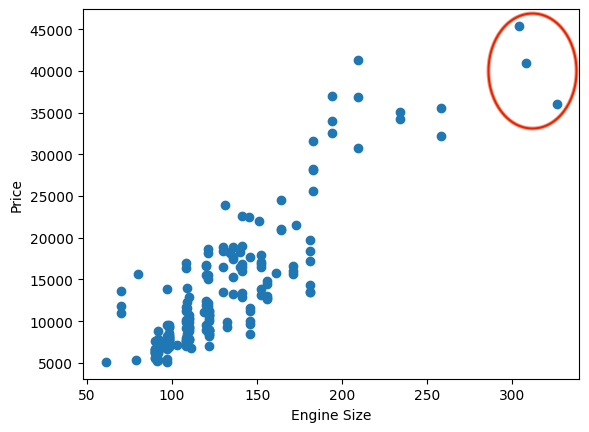

次にcity-mpgとpriceの散布図を確認します。赤丸で囲まれているデータが全体と少し違った傾向に見えます。

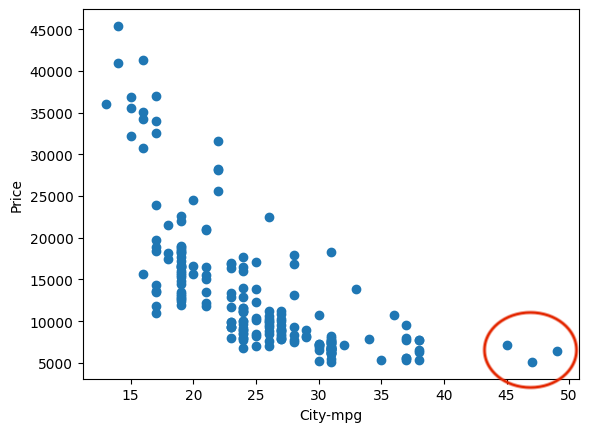

散布図からいずれもcity-mpgが40以上のデータであることがわかるので、除外します。

今回は、'city-mpg'列が40以下のデータを残したいです。以下のように比較演算子を使用して条件を設定できます。

In [ ]:
is_under_40 = df['city-mpg'] <= 40
is_under_40

,city-mpg
0,True
1,True
2,True
3,True
4,True
...,...
200,True
201,True
202,True
203,True


is_under_40 には、各行に対して'city-mpg' 列が40以下という条件に当てはまっているかどうかの真偽値（TrueかFalse）が入っています。条件に当てはまる場合はTrue、それ以外はFalseです。

今回のように、真偽値を使ってデータフレームを絞り込みたい場合は、データフレームが代入された変数名の後に[ ]を付けて、その中に真偽値の情報を入れます。そうすると、Trueの行だけが残ります。
'city-mpg' 列の値が 40 以下の行（is_under_40でTrueの行）を残しましょう。

In [ ]:
df = df[is_under_40]

実際に目的のデータが削除できたか確認してみましょう。前回と同様に散布図を作成します。

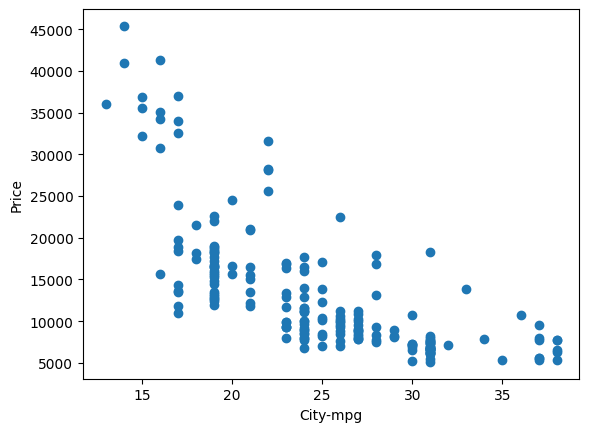

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['city-mpg'], df['price'])
plt.xlabel('City-mpg')
plt.ylabel('Price')
plt.show()

赤丸で囲んでいた部分が無事削除されており、全体としてよりまとまった分布になりました。

次にcurb-weightとpriceの散布図を確認します。こちらにおいても赤丸で囲まれているデータが全体と少し違った傾向に見えます。

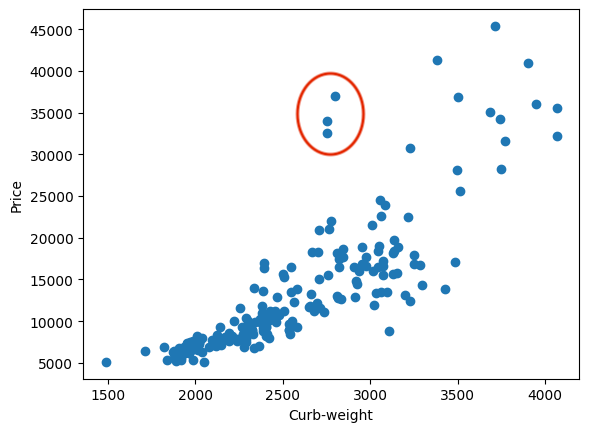

今回はcity-mpgの時と比べ、外れ値が少し複雑な位置にあります。この3つのデータだけが当てはまる条件を考えてみましょう。
すると、外れ値だけが当てはまる条件はcurb-weightが3000以下なおかつpriceが30000以上であると判断できます。
複数の条件を参照したい場合は以下の記号が使えます。

| 記号 | 意味 |
|------|------|
| ＆ | かつ |
| ｜ | または |
| ～ | でない |

今回は、「かつ」なので条件同士を & で繋ぎます。
まずは今回外れ値にあたるデータだけを取り出してみましょう。

In [ ]:
df_out = df[(df['curb-weight'] <= 3000) & (df['price'] >= 30000)]

ちゃんと条件に合った3つのデータだけが取り出されているか確認してみます。

In [ ]:
df_out

,engine-size,city-mpg,curb-weight,price
126,194,17,2756,32528.0
127,194,17,2756,34028.0
128,194,17,2800,37028.0


df_outにはcurb-weightが3000以下なおかつpriceが30000以上のデータが入っていることがわかります。
しかし実際には外れ値以外のデータを残したいので、今度は「でない」の～を全ての条件の前につけてみましょう。

In [ ]:
df = df[~((df['curb-weight'] <= 3000) & (df['price'] >= 30000))]

外れ値以外のデータが残されたはずです。
こちらについても目的のデータが削除できたか確認してみましょう。

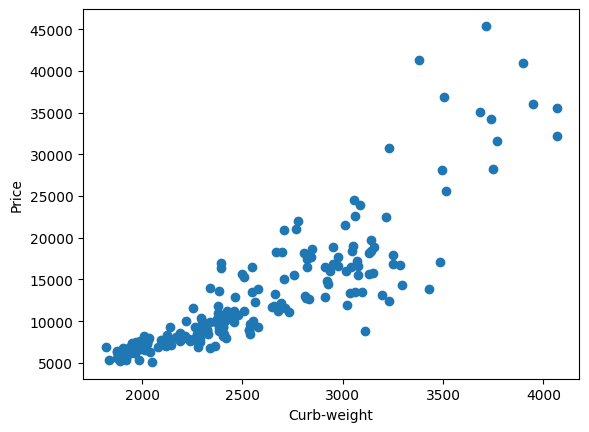

In [ ]:
plt.scatter(df['curb-weight'], df['price'])
plt.xlabel('Curb-weight')
plt.ylabel('Price')
plt.show()

これまで通り、データを説明変数と目的変数に分割します。

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

##2.2. モデルの構築＆評価

学習方法はこれまでと同じです。

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print('各分割における決定係数:', scores)
print('クロスバリデーションの平均決定係数:', scores.mean())

各分割における決定係数: [0.88490776 0.69096002 0.80572898 0.79117215 0.82898366]
クロスバリデーションの平均決定係数: 0.8003505157565154


散布図による外れ値の削除によって、平均決定係数の値が上がりました。

##2.3.演習問題

問2-1.下記リンクの「回帰コースLv2演習Data.csv」をダウンロードしてファイルをアップロードし、pandasのデータフレームとして読み込んでください。読み込んだデータの最初の5行のデータを表示して確認してください。

[回帰コースLv2演習Data.csv](https://drive.google.com/file/d/1aFrtvQn-HJFRnAA3wZYubRWilvDpQMis/view?usp=drive_link)


問2-2.読み込んだデータフレームを用いて、x軸をengine-sizeに、y軸をpriceに設定した散布図を作成してください。

問2-3.図の赤丸部分の外れ値を削除してください。


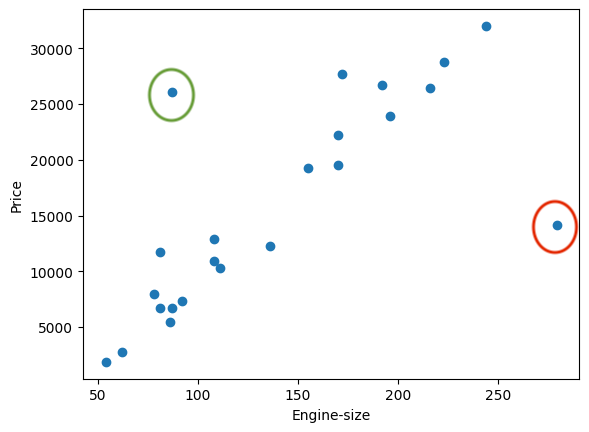

問2-4.問2-3の図の緑丸部分の外れ値を削除してください。